# Project Classification EDA


In [5]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns

In [6]:
#load dataset
file_path = "churn.xlsx"
df = pd.read_excel(file_path)

#dataset loaded succesfully 

In [7]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

 We gonna need to convert the 'Total Charge' in numerical 


In [17]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [19]:
missing_values = df.isnull().sum()
missing_values

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

'Churn reason' is mssing a lot of values 

In [22]:
print(df.describe())

        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Total Charges  Churn Value  Churn Score         CLTV  
count      7043.000000    7032.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692    2283.300441     0.265370    58.699418  4400.295755  
std          30.090047    2266.771362     0.441561    21.525131  1183.057152  
min          18.250000      18.8000

## Visualization


Lets represent the data visually 

### Heatmaps

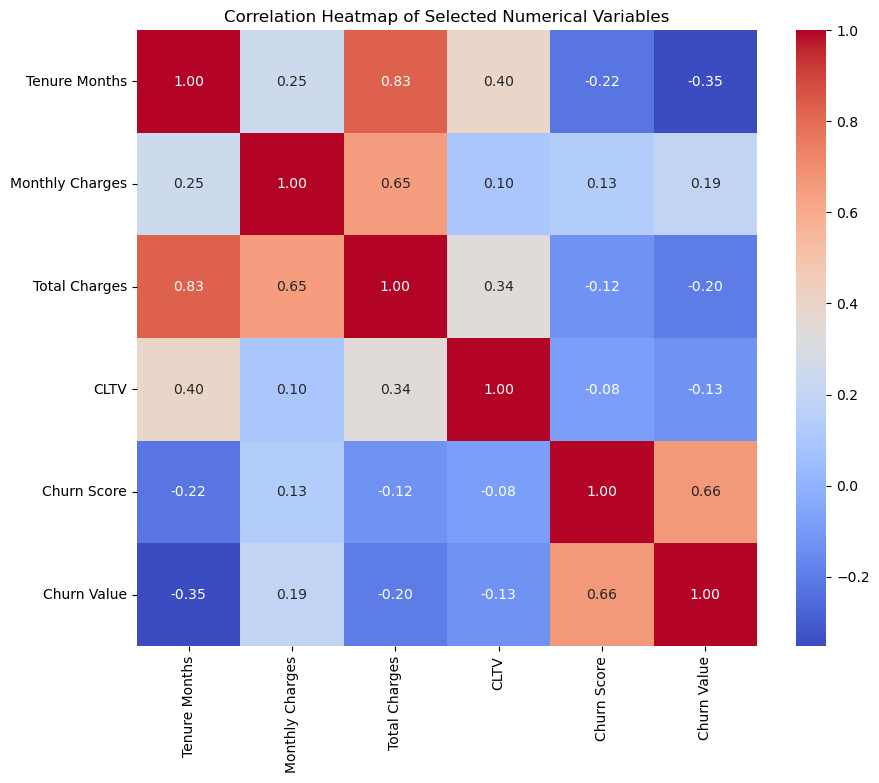

In [27]:
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV', 'Churn Score', 'Churn Value']

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Numerical Variables')
plt.show()

### Distribution for our Key features.

Text(0.5, 0, 'Total Charges')

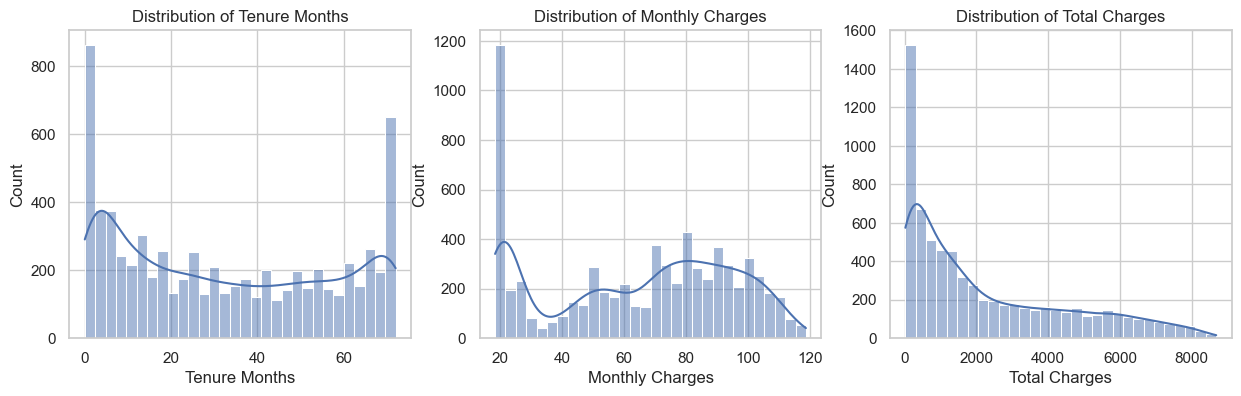

In [30]:
sns.set(style="whitegrid")

# Create a figure with 3 subplots for histograms
plt.figure(figsize=(15, 4))

# Histogram for 'Tenure Months'
plt.subplot(1, 3, 1)
sns.histplot(df['Tenure Months'], kde=True, bins=30)
plt.title('Distribution of Tenure Months')
plt.xlabel('Tenure Months')

# Histogram for 'Monthly Charges'
plt.subplot(1, 3, 2)
sns.histplot(df['Monthly Charges'], kde=True, bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')

# Histogram for 'Total Charges'
plt.subplot(1, 3, 3)
sns.histplot(df['Total Charges'], kde=True, bins=30)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')


### Boxplotting 

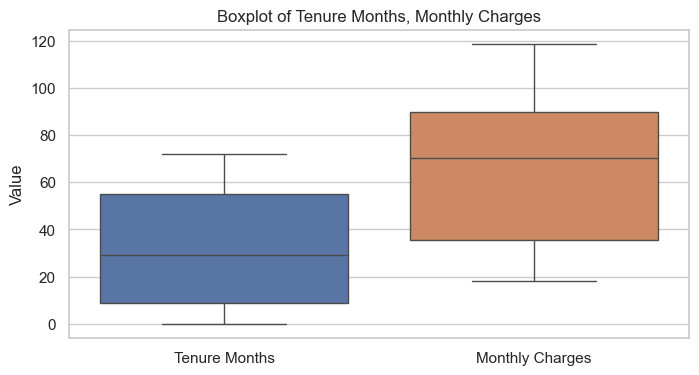

In [33]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Tenure Months', 'Monthly Charges']])
plt.title('Boxplot of Tenure Months, Monthly Charges')
plt.ylabel('Value')
plt.show()

Although 'Tenure Months' and 'Monthly charges' are fairly distributed, 'Monthly Charges' show having higher outliers.

### Feature Engineering 


Combine streming service into one feature


In [38]:
#Combine streaming services 
df['Streaming TV_Numeric'] = (df['Streaming TV'] == 'Yes').astype(int)
df['Streaming Movies_Numeric'] = (df['Streaming Movies'] == 'Yes').astype(int)

# Sum the values to get the total number of streaming services
df['Streaming_Count'] = df['Streaming TV_Numeric'] + df['Streaming Movies_Numeric']

# Check the new feature
print(df[['Streaming TV', 'Streaming Movies', 'Streaming_Count']].head())

  Streaming TV Streaming Movies  Streaming_Count
0           No               No                0
1           No               No                0
2          Yes              Yes                2
3          Yes              Yes                2
4          Yes              Yes                2


In [40]:
features = [
    'Tenure Months', 'Total Charges', 'Gender_Male', 'Partner_Yes', 'Dependents_Yes',
    'Phone Service_Yes', 'Multiple Lines_No phone service', 'Multiple Lines_Yes',
    'Internet Service_Fiber optic', 'Internet Service_No', 'Online Security_No internet service',
    'Online Security_Yes', 'Online Backup_No internet service', 'Online Backup_Yes',
    'Device Protection_No internet service', 'Device Protection_Yes', 'Tech Support_No internet service'
]

# Add the new streaming feature (if already created)
features.append('Streaming_Count')
categorical_features = [
    'Gender', 'Partner', 'Dependents', 'Phone Service', 
    'Multiple Lines', 'Internet Service', 'Online Security', 
    'Online Backup', 'Device Protection', 'Tech Support'
]

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Verify the new columns
print(df_encoded.columns)

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Senior Citizen', 'Tenure Months',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason',
       'Streaming TV_Numeric', 'Streaming Movies_Numeric', 'Streaming_Count',
       'Gender_Male', 'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No internet service', 'Tech Support_Yes'],
      dtype='object')


### Model building 


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df_encoded[features]
y = df_encoded['Churn Value']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline that imputes missing values, scales the data, and trains a Logistic Regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with the mean
    ('scaler', StandardScaler()),                   # Scale features to have zero mean and unit variance
    ('classifier', LogisticRegression(max_iter=1000)) # Logistic Regression classifier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8017037387600567
ROC AUC Score: 0.8479229396676704

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1525
           1       0.68      0.55      0.61       588

    accuracy                           0.80      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.79      0.80      0.80      2113



The model achieves an overall accuracy of about 80.2% and an ROC AUC score of 0.848, indicating it generally distinguishes well between churn and non-churn customers. However, a closer look at the classification report reveals that while the model performs very well in identifying non-churn customers (with high precision and recall), its performance on predicting churn cases is less robust. Specifically, the recall for the churn class is only 55%, meaning that nearly half of the churn cases are not being identified. This suggests potential issues such as class imbalance or the need for further feature engineering to better capture the factors leading to churn.

Let's proceed with the next step: addressing class imbalance to improve the detection of churn (class 1). One simple way to do this is by setting the class_weight parameter in Logistic Regression to 'balanced'. This will adjust the weights inversely proportional to class frequencies.

In [47]:
X = df_encoded[features]
y = df_encoded['Churn Value']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with imputation, scaling, and Logistic Regression with balanced class weights
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values using the mean
    ('scaler', StandardScaler()),                   # Scale features
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7524846190250828
ROC AUC Score: 0.8482485781197726

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1525
           1       0.54      0.79      0.64       588

    accuracy                           0.75      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.75      0.76      2113



In [57]:
from sklearn.model_selection import GridSearchCV

# Define pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],  
}

# Grid Search initialising
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Lancer la recherche sur l'ensemble d'entraînement
grid_search.fit(X_train, y_train)

# shows best parameters
print("Best parameters:", grid_search.best_params_)

# Prediction with best model
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2'}
Accuracy: 0.751538097491718
ROC AUC Score: 0.8482943013270883

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1525
           1       0.54      0.79      0.64       588

    accuracy                           0.75      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.75      0.76      2113



precision of 90%